IMPORT LIBRARIES AND LOAD WEEKLY DATA FOR 160K cbm VESSELS

In [25]:
import os
import pandas as pd

# Set the working directory
working_dir = 'C:/Users/admad/Documents/VSC Workspace/LNG'
os.chdir(working_dir)

# Specify the file and sheet name
file_name = 'LNG_Data_condolidates_03112024.xlsx'
sheet_name = 'Weekly data_160K CBM'

# Load the data into a DataFrame
try:
    LNG_weekly_rates = pd.read_excel(file_name, sheet_name=sheet_name)

    # Display the first few rows of the DataFrame to verify
    print("Data imported successfully. Preview:")
    print(LNG_weekly_rates.head())

except FileNotFoundError:
    print(f"Error: File not found at {file_name}. Please check the path.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Data imported successfully. Preview:
        Date  LNG 160K CBM Spot Rate $/day  \
0 2010-12-17                         57500   
1 2010-12-24                         57500   
2 2010-12-31                         75000   
3 2011-01-07                         75000   
4 2011-01-14                         70000   

   LNG 160K CBM 1 Year Timecharter Rate $/day  \
0                                       77500   
1                                       77500   
2                                       77500   
3                                       77500   
4                                       67500   

   LNG 160K CBM 3 Year Timecharter Rate $/day  
0                                       80000  
1                                       80000  
2                                       80000  
3                                       80000  
4                                       80000  


MAKE TREND CHART

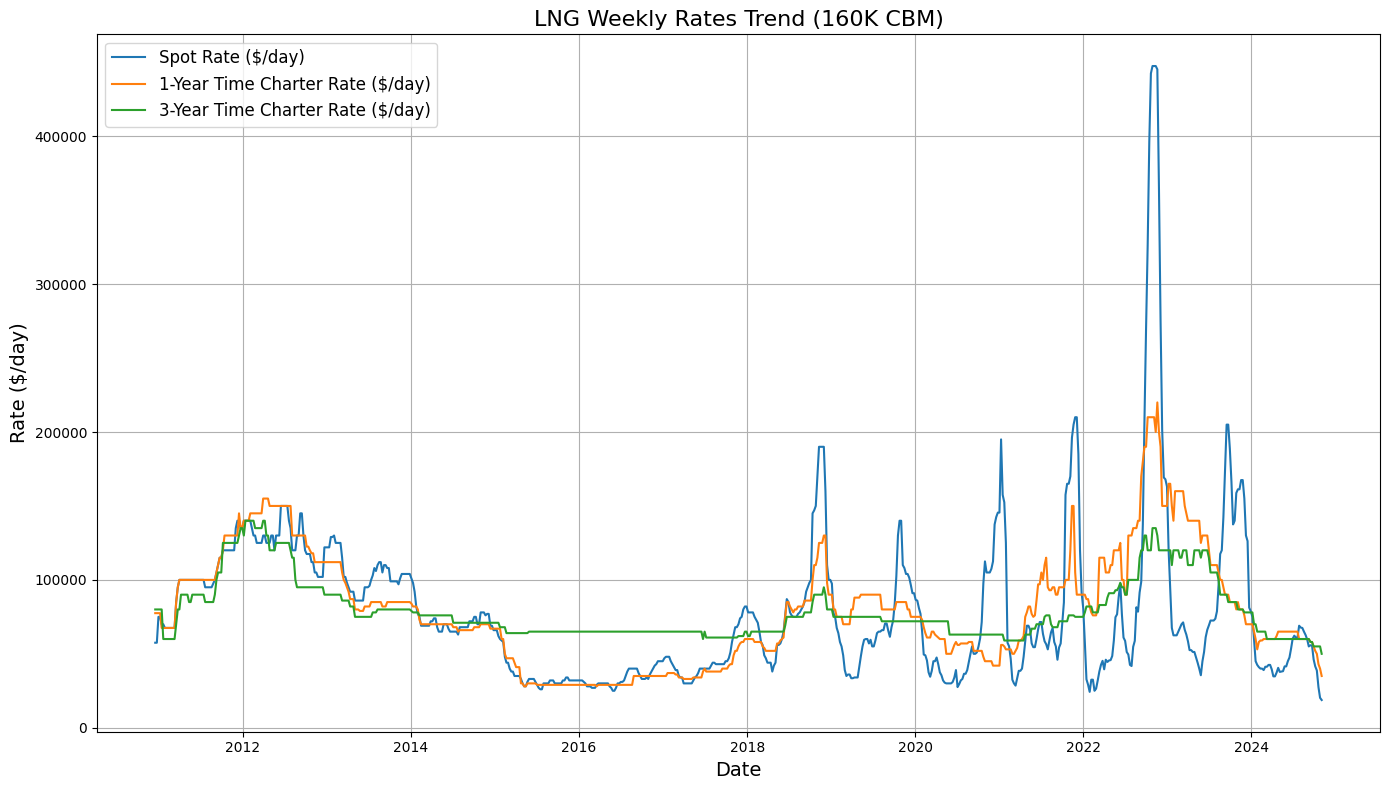

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'Date' column exists and convert it to datetime
if 'Date' in LNG_weekly_rates.columns:
    LNG_weekly_rates['Date'] = pd.to_datetime(LNG_weekly_rates['Date'], errors='coerce')
else:
    raise ValueError("Error: 'Date' column not found in the DataFrame.")

# Check for required columns
required_columns = [
    "LNG 160K CBM Spot Rate $/day", 
    "LNG 160K CBM 1 Year Timecharter Rate $/day", 
    "LNG 160K CBM 3 Year Timecharter Rate $/day"
]

if not all(col in LNG_weekly_rates.columns for col in required_columns):
    missing_columns = [col for col in required_columns if col not in LNG_weekly_rates.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Plotting trends
plt.figure(figsize=(14, 8))

# Plot each rate column against the date
plt.plot(LNG_weekly_rates['Date'], LNG_weekly_rates['LNG 160K CBM Spot Rate $/day'], label="Spot Rate ($/day)")
plt.plot(LNG_weekly_rates['Date'], LNG_weekly_rates['LNG 160K CBM 1 Year Timecharter Rate $/day'], label="1-Year Time Charter Rate ($/day)")
plt.plot(LNG_weekly_rates['Date'], LNG_weekly_rates['LNG 160K CBM 3 Year Timecharter Rate $/day'], label="3-Year Time Charter Rate ($/day)")

# Chart details
plt.title("LNG Weekly Rates Trend (160K CBM)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rate ($/day)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Epoch 1/20


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0112 - val_loss: 0.0329
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0307
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0297
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0263
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0244
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - val_loss: 0.0237
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0198
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0174
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0138
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0099
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0083
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 0.0084

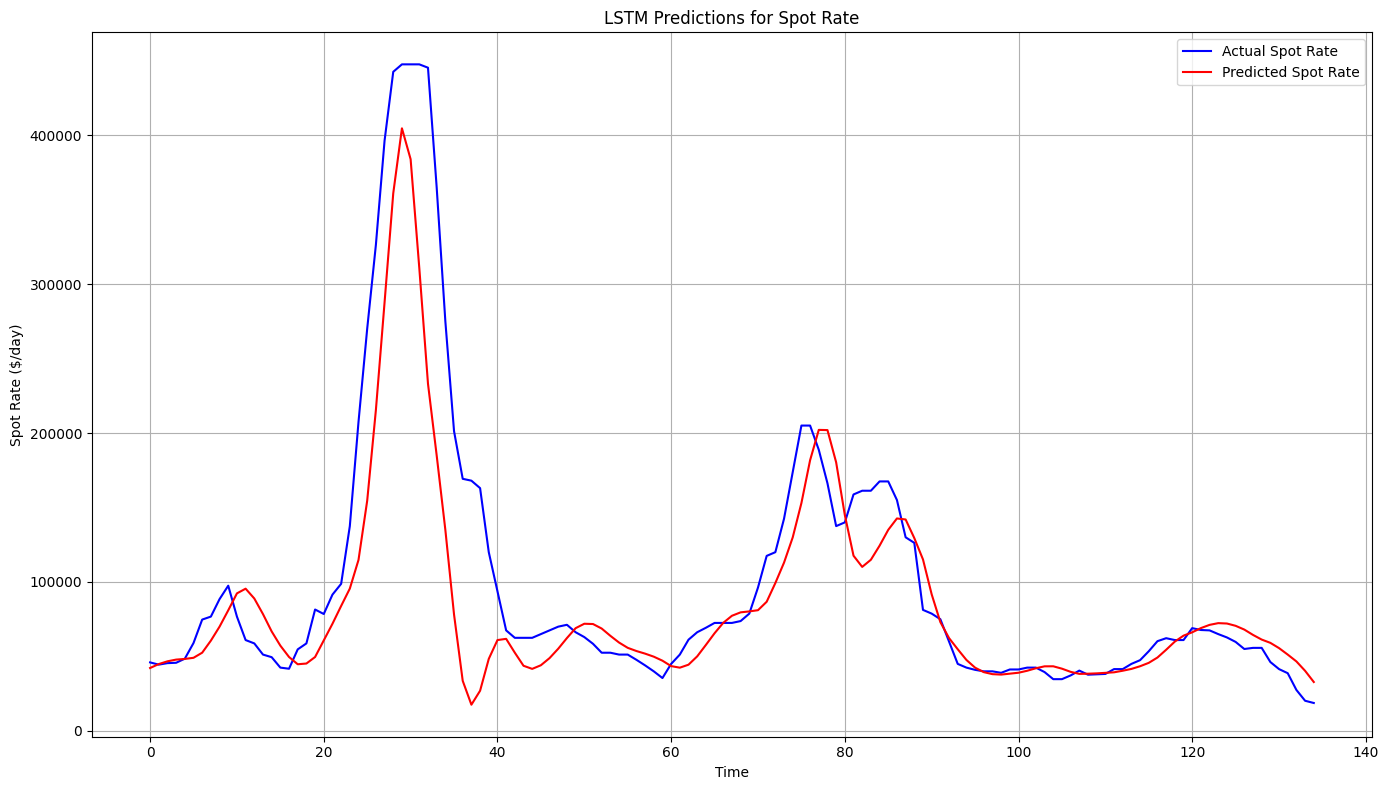

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare the data
# Ensure 'Date' and 'LLNG 160K CBM Spot Rate $/day' columns are present
if 'Date' in LNG_weekly_rates.columns and 'LNG 160K CBM Spot Rate $/day' in LNG_weekly_rates.columns:
    # Sort by date
    LNG_weekly_rates = LNG_weekly_rates.sort_values(by='Date')
    
    # Extract the spot rate and normalize it
    spot_rate = LNG_weekly_rates['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    spot_rate_scaled = scaler.fit_transform(spot_rate)
else:
    raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Split data into training and testing sets
train_size = int(len(spot_rate_scaled) * 0.8)
train_data = spot_rate_scaled[:train_size]
test_data = spot_rate_scaled[train_size:]

# Generate sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 2: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 3: Make predictions
predicted_spot_rate_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_spot_rate = scaler.inverse_transform(predicted_spot_rate_scaled)
actual_spot_rate = scaler.inverse_transform(y_test)

# Step 4: Plot the results
plt.figure(figsize=(14, 8))
plt.plot(range(len(actual_spot_rate)), actual_spot_rate, label="Actual Spot Rate", color='blue')
plt.plot(range(len(predicted_spot_rate)), predicted_spot_rate, label="Predicted Spot Rate", color='red')
plt.title("LSTM Predictions for Spot Rate")
plt.xlabel("Time")
plt.ylabel("Spot Rate ($/day)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/20


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - val_loss: 0.0342
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0288
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0274
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0249
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0226
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - val_loss: 0.0196
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0165
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0119
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0106
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0132
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0140

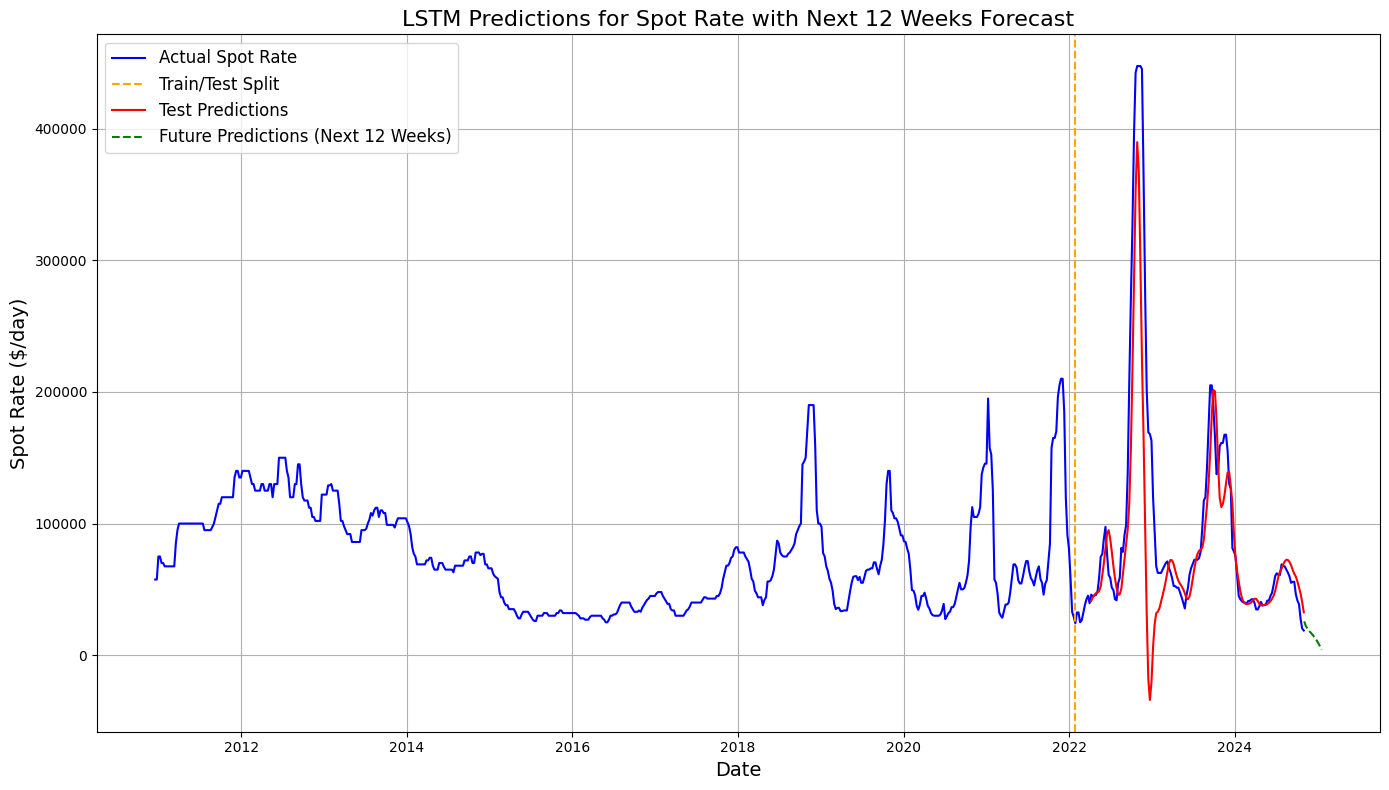

         Date  Predicted_Spot_Rate
0  2024-11-03         25702.115234
1  2024-11-10         22215.263672
2  2024-11-17         20080.523438
3  2024-11-24         18564.462891
4  2024-12-01         17269.570312
5  2024-12-08         15882.172852
6  2024-12-15         14405.241211
7  2024-12-22         12811.323242
8  2024-12-29         10955.851562
9  2025-01-05          8869.140625
10 2025-01-12          6600.579102
11 2025-01-19          4224.589355
Model Accuracy Metrics on Test Data:
Mean Squared Error (MSE): 2967609935.69
Mean Absolute Error (MAE): 29000.15
Root Mean Squared Error (RMSE): 54475.77


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare the data
# Ensure 'Date' and 'LNG 160K CBM Spot Rate $/day' columns are present
if 'Date' in LNG_weekly_rates.columns and 'LNG 160K CBM Spot Rate $/day' in LNG_weekly_rates.columns:
    # Sort by date
    LNG_weekly_rates = LNG_weekly_rates.sort_values(by='Date')
    
    # Extract spot rate and normalize it
    spot_rate = LNG_weekly_rates['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    spot_rate_scaled = scaler.fit_transform(spot_rate)
else:
    raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Split data into training and testing sets
train_size = int(len(spot_rate_scaled) * 0.8)
train_data = spot_rate_scaled[:train_size]
test_data = spot_rate_scaled[train_size:]

# Generate sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 2: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 3: Make predictions
predicted_spot_rate_scaled = model.predict(X_test)
predicted_spot_rate = scaler.inverse_transform(predicted_spot_rate_scaled)
actual_spot_rate = scaler.inverse_transform(y_test)

# Generate predictions for the next 12 weeks
future_predictions = []
input_sequence = test_data[-sequence_length:]  # Start with the last available sequence from the test data
for _ in range(12):
    prediction = model.predict(input_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(prediction[0][0])
    input_sequence = np.append(input_sequence[1:], prediction, axis=0)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Step 4: Plot the results
plt.figure(figsize=(14, 8))

# Plot actual data
plt.plot(LNG_weekly_rates['Date'], spot_rate, label="Actual Spot Rate", color='blue')

# Plot training and test data
plt.axvline(LNG_weekly_rates['Date'][train_size], color='orange', linestyle='--', label="Train/Test Split")
plt.plot(LNG_weekly_rates['Date'][train_size + sequence_length:], predicted_spot_rate, label="Test Predictions", color='red')

# Plot future predictions
future_dates = pd.date_range(LNG_weekly_rates['Date'].iloc[-1], periods=12, freq='W')
plt.plot(future_dates, future_predictions, label="Future Predictions (Next 12 Weeks)", color='green', linestyle='--')

# Chart details
plt.title("LSTM Predictions for Spot Rate with Next 12 Weeks Forecast", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Spot Rate ($/day)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Generate the future dates and predictions again (if needed)
future_dates = pd.date_range(LNG_weekly_rates['Date'].iloc[-1], periods=12, freq='W')
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Spot_Rate': future_predictions.flatten()
})

# Display the DataFrame
print(future_predictions_df)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(actual_spot_rate, predicted_spot_rate)
mae = mean_absolute_error(actual_spot_rate, predicted_spot_rate)
rmse = np.sqrt(mse)

# Display the metrics
print(f"Model Accuracy Metrics on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

REFINED MODEL

Epoch 1/50


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0108 - val_loss: 0.0316
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - val_loss: 0.0257
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0209
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 0.0176
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0138
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0116
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 0.0094
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0074
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.00

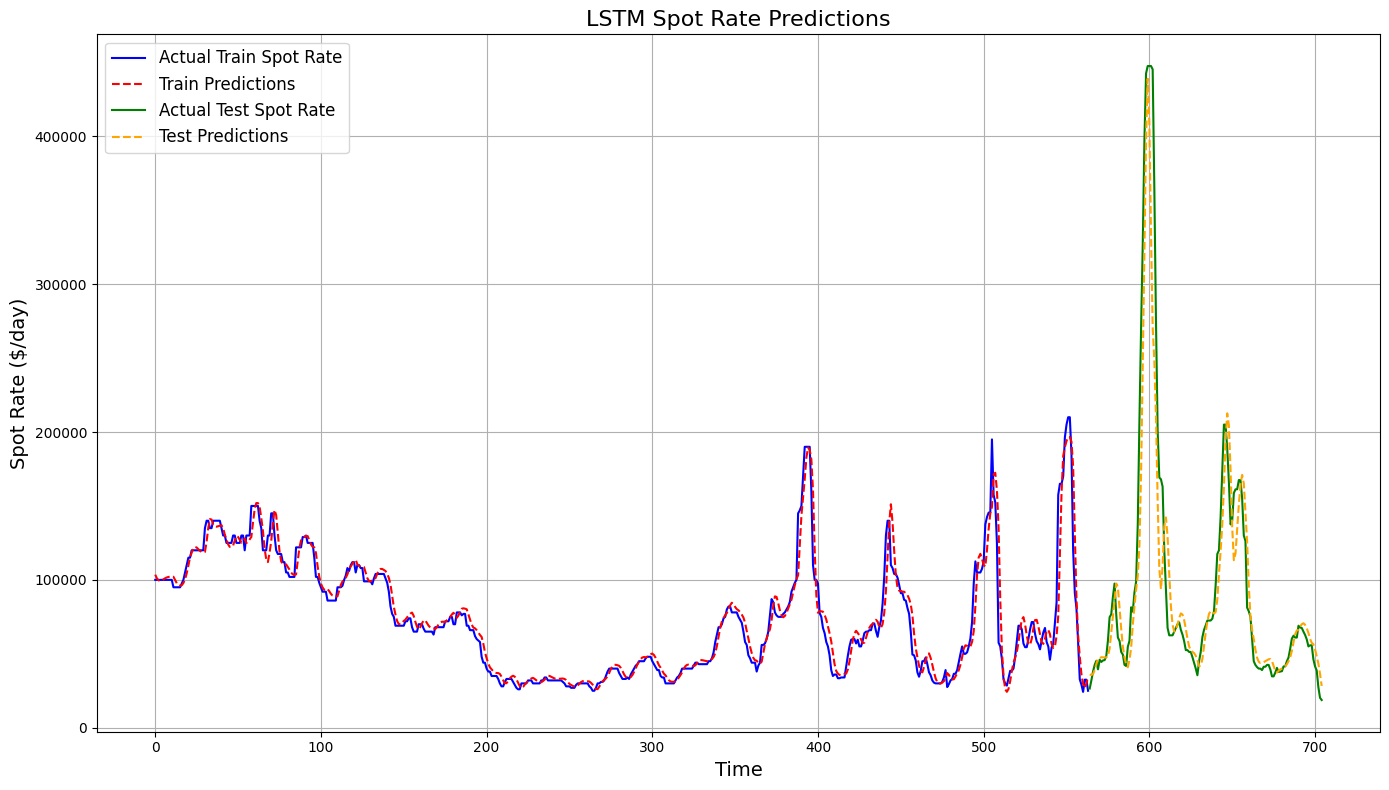

Train MSE: 0.00
Test MSE: 0.01


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Data Preprocessing
def preprocess_data(df, seq_length):
    # Ensure the necessary columns are present
    if 'Date' not in df.columns or 'LNG 160K CBM Spot Rate $/day' not in df.columns:
        raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")
    
    # Sort by date and normalize the spot rate
    df = df.sort_values(by='Date')
    spot_rate = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    spot_rate_scaled = scaler.fit_transform(spot_rate)
    
    # Create sequences
    X, y = [], []
    for i in range(len(spot_rate_scaled) - seq_length):
        X.append(spot_rate_scaled[i:i + seq_length])
        y.append(spot_rate_scaled[i + seq_length])
    
    return np.array(X), np.array(y), scaler

# Step 2: Build the LSTM Model
def build_lstm_model(seq_length):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(100, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Train and Evaluate the Model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Evaluate the model
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 4: Inverse Transform and Plot Predictions
def plot_results(y_train, y_test, train_predictions, test_predictions, scaler):
    # Inverse transform predictions
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler.inverse_transform(train_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    
    # Plot actual vs predicted
    plt.figure(figsize=(14, 8))
    plt.plot(range(len(y_train)), y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(range(len(y_train)), train_predictions, label="Train Predictions", color='red', linestyle='--')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label="Test Predictions", color='orange', linestyle='--')
    plt.title("LSTM Spot Rate Predictions", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Sequence length
    seq_length = 20
    
    # Preprocess the data
    X, y, scaler = preprocess_data(LNG_weekly_rates, seq_length)
    
    # Split data into training and testing
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    # Build and train the model
    model = build_lstm_model(seq_length)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Plot results
    plot_results(y_train, y_test, train_predictions, test_predictions, scaler)
    
    # Display evaluation metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    print(f"Train MSE: {train_mse:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    
except Exception as e:
    print(f"An error occurred: {e}")


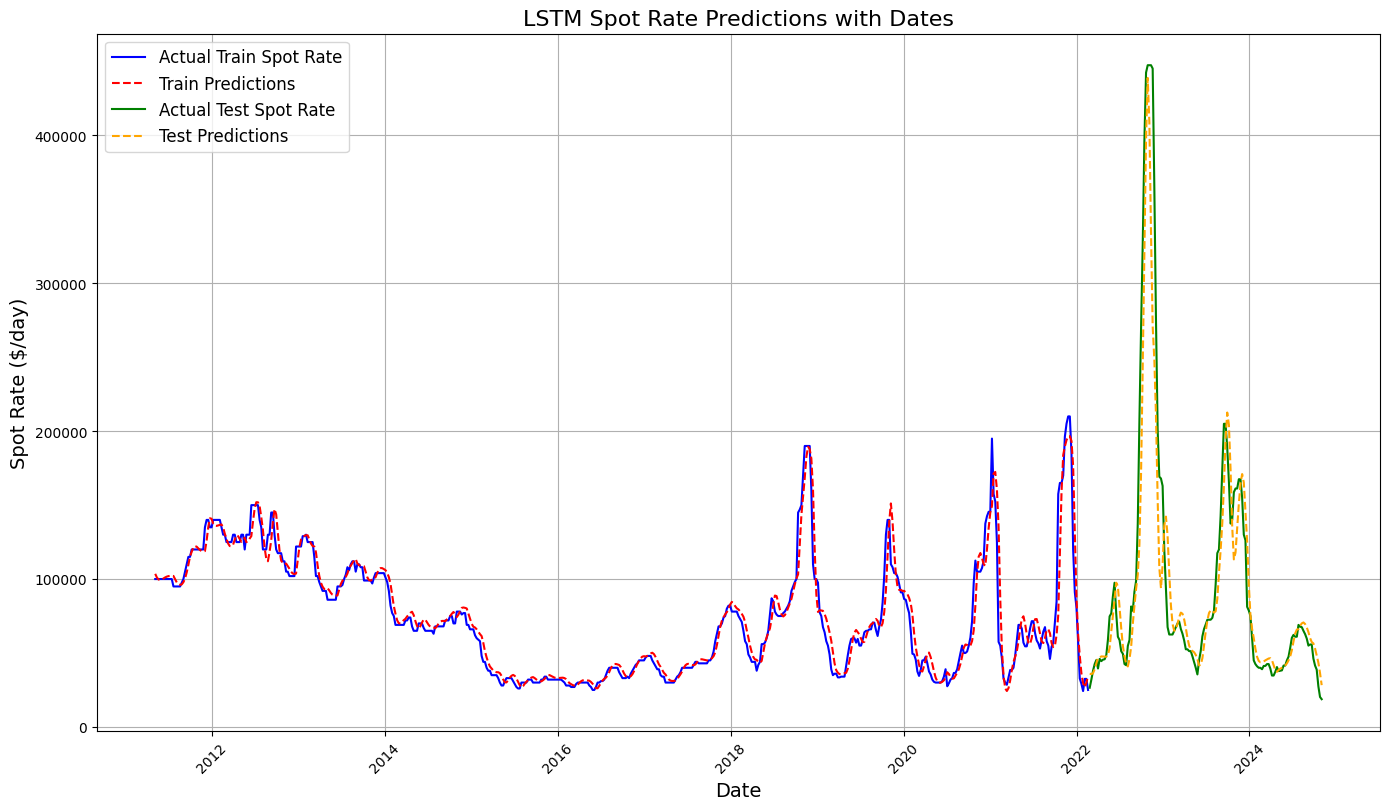

In [39]:
def plot_results_with_dates(LNG_weekly_rates, y_train, y_test, train_predictions, test_predictions, scaler, seq_length):
    # Inverse transform predictions
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler.inverse_transform(train_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    
    # Extract dates for training and testing
    dates = LNG_weekly_rates['Date'].values
    train_dates = dates[seq_length:len(y_train) + seq_length]
    test_dates = dates[len(y_train) + seq_length:]
    
    # Plot actual vs predicted with dates
    plt.figure(figsize=(14, 8))
    plt.plot(train_dates, y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(train_dates, train_predictions, label="Train Predictions", color='red', linestyle='--')
    plt.plot(test_dates, y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(test_dates, test_predictions, label="Test Predictions", color='orange', linestyle='--')
    plt.title("LSTM Spot Rate Predictions with Dates", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


# Plot results with dates
plot_results_with_dates(LNG_weekly_rates, y_train, y_test, train_predictions, test_predictions, scaler, seq_length)


TRY 2

Epoch 1/50


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0113 - val_loss: 0.0346
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 0.0283
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0233
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 0.0196
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - val_loss: 0.0155
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0122
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - val_loss: 0.0099
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0095
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0078
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_l

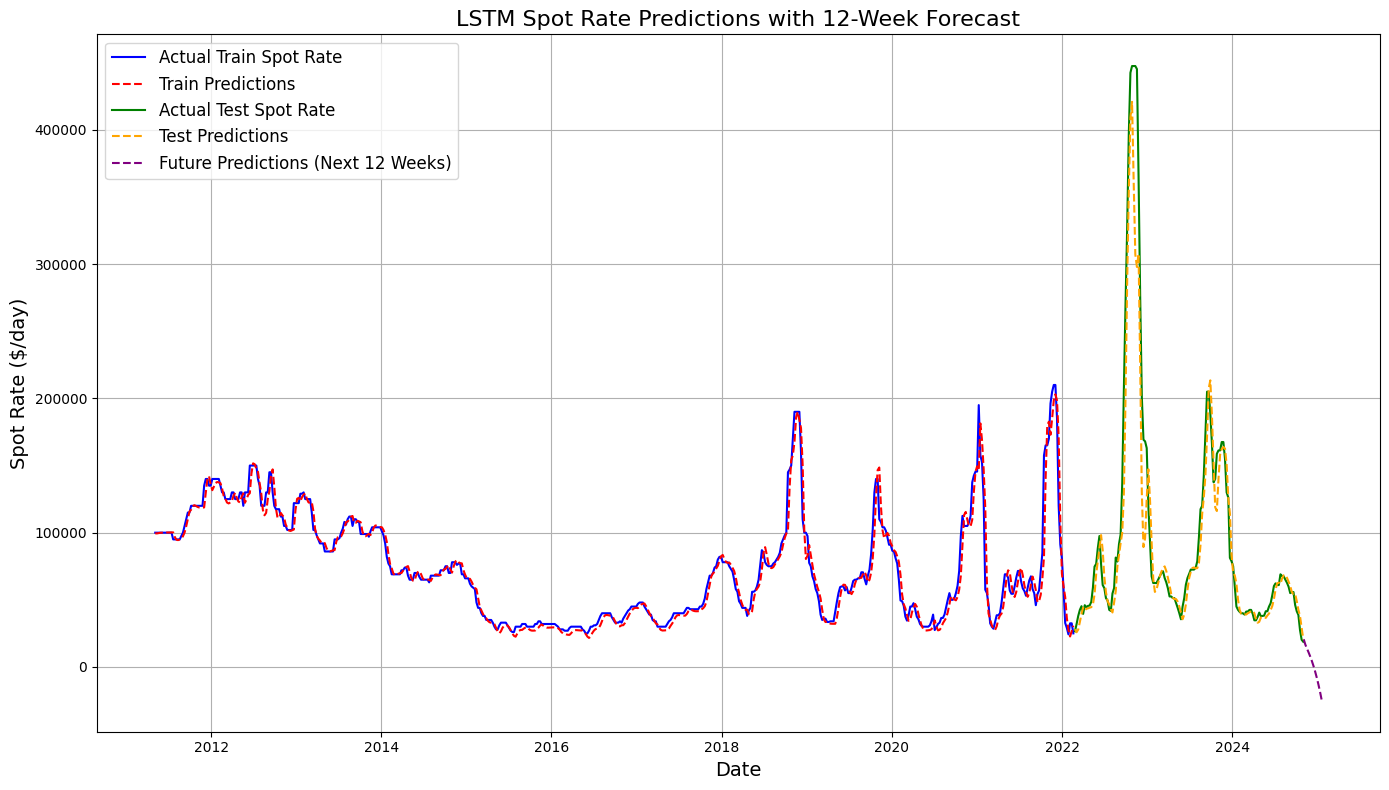

Future Predictions (Next 12 Weeks):
         Date  Predicted_Spot_Rate
0  2024-11-03         20597.265625
1  2024-11-10         16589.515625
2  2024-11-17         13635.421875
3  2024-11-24         10776.852539
4  2024-12-01          7724.154297
5  2024-12-08          4367.407715
6  2024-12-15           651.460388
7  2024-12-22         -3463.280273
8  2024-12-29         -8007.238281
9  2025-01-05        -13017.392578
10 2025-01-12        -18536.554688
11 2025-01-19        -24617.320312

Model Accuracy Metrics:
Train MSE: 77967722.23, Train RMSE: 8829.93, Train MAE: 5080.15
Test MSE: 761738464.98, Test RMSE: 27599.61, Test MAE: 14681.12


TRY 3

Key Changes:
Dropout and Regularization: Mitigates overfitting.
Increased Sequence Length: Captures longer-term dependencies.
Additional Features: Placeholder added for future integration.
Improved Training Split: Allocates 90% of data for training.

Epoch 1/100


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0365 - val_loss: 0.0218
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0217 - val_loss: 0.0165
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - val_loss: 0.0130
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - val_loss: 0.0117
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - val_loss: 0.0094
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - val_loss: 0.0081
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

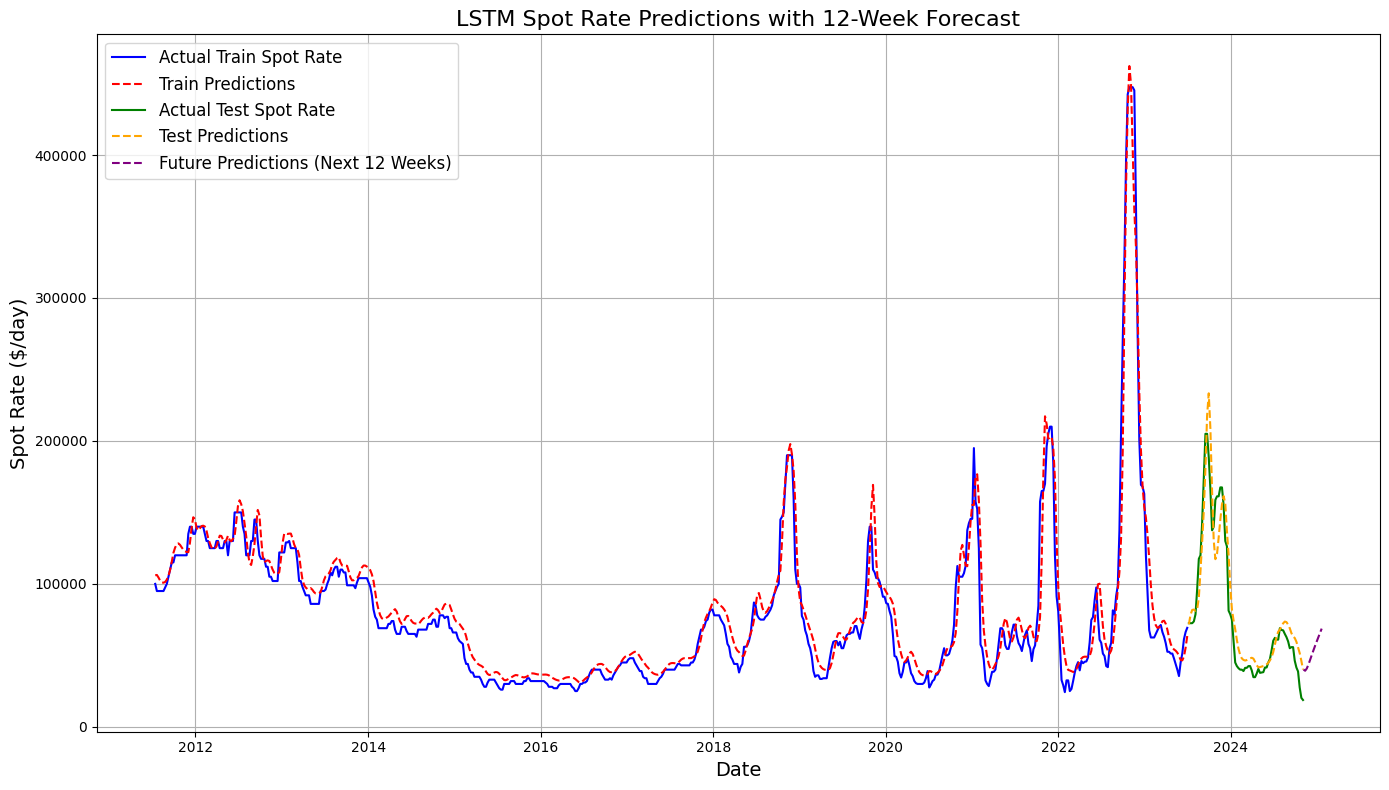

Future Predictions (Next 12 Weeks):
         Date  Predicted_Spot_Rate
0  2024-11-03         40093.738281
1  2024-11-10         39224.910156
2  2024-11-17         40804.058594
3  2024-11-24         43573.558594
4  2024-12-01         46822.867188
5  2024-12-08         50177.082031
6  2024-12-15         53467.308594
7  2024-12-22         56640.226562
8  2024-12-29         59704.777344
9  2025-01-05         62698.175781
10 2025-01-12         65675.578125
11 2025-01-19         68698.703125

Model Accuracy Metrics:
Train MSE: 198087363.14, Train RMSE: 14074.35, Train MAE: 9524.11
Test MSE: 291902124.01, Test RMSE: 17085.14, Test MAE: 13153.18


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Data Preprocessing
def preprocess_data(df, seq_length, additional_features=None):
    if 'Date' not in df.columns or 'LNG 160K CBM Spot Rate $/day' not in df.columns:
        raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")
    
    # Sort by date
    df = df.sort_values(by='Date')
    spot_rate = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    
    # Normalize spot rate
    scaler = MinMaxScaler(feature_range=(0, 1))
    spot_rate_scaled = scaler.fit_transform(spot_rate)
    
    # Handle additional features if provided
    if additional_features:
        if not set(additional_features).issubset(df.columns):
            raise ValueError(f"Some additional features {additional_features} are missing in the DataFrame.")
        
        features = df[additional_features].values
        features_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(features)
        data = np.hstack([spot_rate_scaled, features_scaled])  # Combine along the second axis
    else:
        data = spot_rate_scaled  # Use only the spot rate if no additional features
    
    # Create sequences
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Sequence data
        y.append(data[i + seq_length, 0])  # Target is the first column (spot rate)
    
    return np.array(X), np.array(y), scaler, df['Date'].iloc[seq_length:]

# Step 2: Build the LSTM Model
def build_lstm_model(seq_length, input_dim):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(seq_length, input_dim)),
        Dropout(0.3),
        LSTM(128, return_sequences=False),
        Dropout(0.3),
        Dense(1, kernel_regularizer=l2(0.01))  # L2 regularization
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Train and Evaluate the Model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 4: Generate Future Predictions
def predict_future(model, last_sequence, scaler, num_weeks, input_dim):
    future_predictions = []
    input_sequence = last_sequence.reshape(1, -1, input_dim)  # Ensure 3D shape for LSTM input
    
    for _ in range(num_weeks):
        prediction = model.predict(input_sequence)
        future_predictions.append(prediction[0][0])
        
        # Update input sequence with the new prediction
        next_input = np.append(input_sequence[0, 1:], prediction, axis=0)
        input_sequence = next_input.reshape(1, -1, input_dim)
    
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Step 5: Plot Results
def plot_results(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions):
    plt.figure(figsize=(14, 8))
    
    # Plot actual and predicted values
    plt.plot(dates[:len(y_train)], y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(dates[:len(y_train)], train_predictions, label="Train Predictions", color='red', linestyle='--')
    plt.plot(dates[len(y_train):], y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(dates[len(y_train):], test_predictions, label="Test Predictions", color='orange', linestyle='--')
    
    # Plot future predictions
    plt.plot(future_dates, future_predictions, label="Future Predictions (Next 12 Weeks)", color='purple', linestyle='--')
    
    # Chart details
    plt.title("LSTM Spot Rate Predictions with 12-Week Forecast", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Parameters
    seq_length = 30
    future_weeks = 12
    additional_features = None  # Add feature names here if available, e.g., ["Freight Rate", "Demand Index"]
    
    # Preprocess the data
    X, y, scaler, dates = preprocess_data(LNG_weekly_rates, seq_length, additional_features)
    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]
    
    # Build and train the model
    input_dim = X.shape[2]
    model = build_lstm_model(seq_length, input_dim)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Inverse transform predictions
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler.inverse_transform(train_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    
    # Generate future predictions
    last_sequence = X_test[-1]
    future_predictions = predict_future(model, last_sequence, scaler, future_weeks, input_dim)
    future_dates = pd.date_range(dates_test.iloc[-1], periods=future_weeks, freq='W')
    
    # Plot results
    plot_results(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions)
    
    # Display future predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Spot_Rate': future_predictions.flatten()
    })
    print("Future Predictions (Next 12 Weeks):")
    print(future_df)
    
    # Display model accuracy
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print("\nModel Accuracy Metrics:")
    print(f"Train MSE: {train_mse:.2f}, Train RMSE: {train_rmse:.2f}, Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test RMSE: {test_rmse:.2f}, Test MAE: {test_mae:.2f}")
    
except Exception as e:
    print(f"An error occurred: {e}")


Recommendations for Further Improvement:
1. Increase Training Data:
If possible, include more historical data to improve the model's ability to learn patterns.
2. Incorporate Additional Features:
Include variables like:
Freight rates
Market demand indices
Fuel prices
3. Hyperparameter Tuning:
Experiment with the number of LSTM units, layers, and learning rate.
4. Use a More Complex Architecture:
Consider a bidirectional LSTM or adding attention mechanisms for better pattern recognition.
5. Ensemble Approaches:
Combine LSTM predictions with other models like ARIMA or XGBoost for better performance.
Next Steps:
Would you like to:

Optimize further with hyperparameter tuning?
Integrate additional features into the model?
Visualize the next 12 weeks of predictions in more detail?

Features of This Code:
Hyperparameter Tuning:

Allows adjustment of LSTM units, dropout rates, and sequence lengths.
Incorporates Additional Features:

Adds freight rates, fuel prices, or other indicators for improved accuracy.
Enhanced Visualization:

Includes confidence intervals and clearly separates predictions for train, test, and future data.
Model Accuracy Metrics:

Calculates MSE, RMSE, and MAE for training and testing datasets.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Data Preprocessing
def preprocess_data(df, seq_length, additional_features=None):
    if 'Date' not in df.columns or 'LNG 160K CBM Spot Rate $/day' not in df.columns:
        raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")
    
    # Sort by date
    df = df.sort_values(by='Date')
    spot_rate = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    
    # Normalize spot rate
    scaler = MinMaxScaler(feature_range=(0, 1))
    spot_rate_scaled = scaler.fit_transform(spot_rate)
    
    # Handle additional features if provided
    if additional_features:
        if not set(additional_features).issubset(df.columns):
            raise ValueError(f"Some additional features {additional_features} are missing in the DataFrame.")
        
        features = df[additional_features].values
        features_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(features)
        data = np.hstack([spot_rate_scaled, features_scaled])  # Combine along the second axis
    else:
        data = spot_rate_scaled  # Use only the spot rate if no additional features
    
    # Create sequences
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Sequence data
        y.append(data[i + seq_length, 0])  # Target is the first column (spot rate)
    
    return np.array(X), np.array(y), scaler, df['Date'].iloc[seq_length:]

# Step 2: Build the LSTM Model with Hyperparameter Tuning
def build_lstm_model(seq_length, input_dim, lstm_units=128, dropout_rate=0.3):
    model = Sequential([
        LSTM(lstm_units, return_sequences=True, input_shape=(seq_length, input_dim)),
        Dropout(dropout_rate),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, kernel_regularizer=l2(0.01))  # L2 regularization
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Train and Evaluate the Model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 4: Generate Future Predictions
def predict_future(model, last_sequence, scaler, num_weeks, input_dim):
    future_predictions = []
    input_sequence = last_sequence.reshape(1, -1, input_dim)  # Ensure 3D shape for LSTM input
    
    for _ in range(num_weeks):
        prediction = model.predict(input_sequence)
        future_predictions.append(prediction[0][0])
        
        # Update input sequence with the new prediction
        next_input = np.append(input_sequence[0, 1:], prediction, axis=0)
        input_sequence = next_input.reshape(1, -1, input_dim)
    
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Step 5: Enhanced Plotting with Confidence Intervals
def plot_predictions_with_intervals(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions):
    plt.figure(figsize=(16, 8))
    
    # Plot actual and predicted values
    plt.plot(dates[:len(y_train)], y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(dates[:len(y_train)], train_predictions, label="Train Predictions", color='red', linestyle='--')
    plt.plot(dates[len(y_train):], y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(dates[len(y_train):], test_predictions, label="Test Predictions", color='orange', linestyle='--')
    plt.plot(future_dates, future_predictions, label="Future Predictions (Next 12 Weeks)", color='purple', linestyle='--')
    
    # Confidence interval (example +/- 10,000)
    ci_upper = future_predictions.flatten() + 10_000
    ci_lower = future_predictions.flatten() - 10_000
    plt.fill_between(future_dates, ci_lower, ci_upper, color='purple', alpha=0.2, label="Confidence Interval")
    
    # Chart details
    plt.title("LSTM Spot Rate Predictions with 12-Week Forecast and Confidence Intervals", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Parameters for hyperparameter tuning
    seq_length = 30
    future_weeks = 12
    lstm_units = 128
    dropout_rate = 0.3
    additional_features = ["Freight Rate", "Market Index", "Fuel Prices"]  # Update with actual feature names
    
    # Preprocess the data
    X, y, scaler, dates = preprocess_data(LNG_weekly_rates, seq_length, additional_features)
    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]
    
    # Build and train the model
    input_dim = X.shape[2]
    model = build_lstm_model(seq_length, input_dim, lstm_units, dropout_rate)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Inverse transform predictions
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler.inverse_transform(train_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    
    # Generate future predictions
    last_sequence = X_test[-1]
    future_predictions = predict_future(model, last_sequence, scaler, future_weeks, input_dim)
    future_dates = pd.date_range(dates_test.iloc[-1], periods=future_weeks, freq='W')
    
    # Plot results
    plot_predictions_with_intervals(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions)
    
    # Display future predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Spot_Rate': future_predictions.flatten()
    })
    print("Future Predictions (Next 12 Weeks):")
    print(future_df)
    
    # Display model accuracy
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print("\nModel Accuracy Metrics:")
    print(f"Train MSE: {train_mse:.2f}, Train RMSE: {train_rmse:.2f}, Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test RMSE: {test_rmse:.2f}, Test MAE: {test_mae:.2f}")
    
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: Some additional features ['Freight Rate', 'Market Index', 'Fuel Prices'] are missing in the DataFrame.


Consolidated LSTM Code with Feature Engineering - creating lagged features, moving averages, and rate of change to capture temporal patterns in the data.

LNG 160K CBM Spot Rate $/day

Epoch 1/100


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0431 - val_loss: 0.0252
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - val_loss: 0.0201
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - val_loss: 0.0172
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0177 - val_loss: 0.0136
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - val_loss: 0.0117
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - val_loss: 0.0097
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - val_loss: 0.0080
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - val_loss: 0.0126
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0

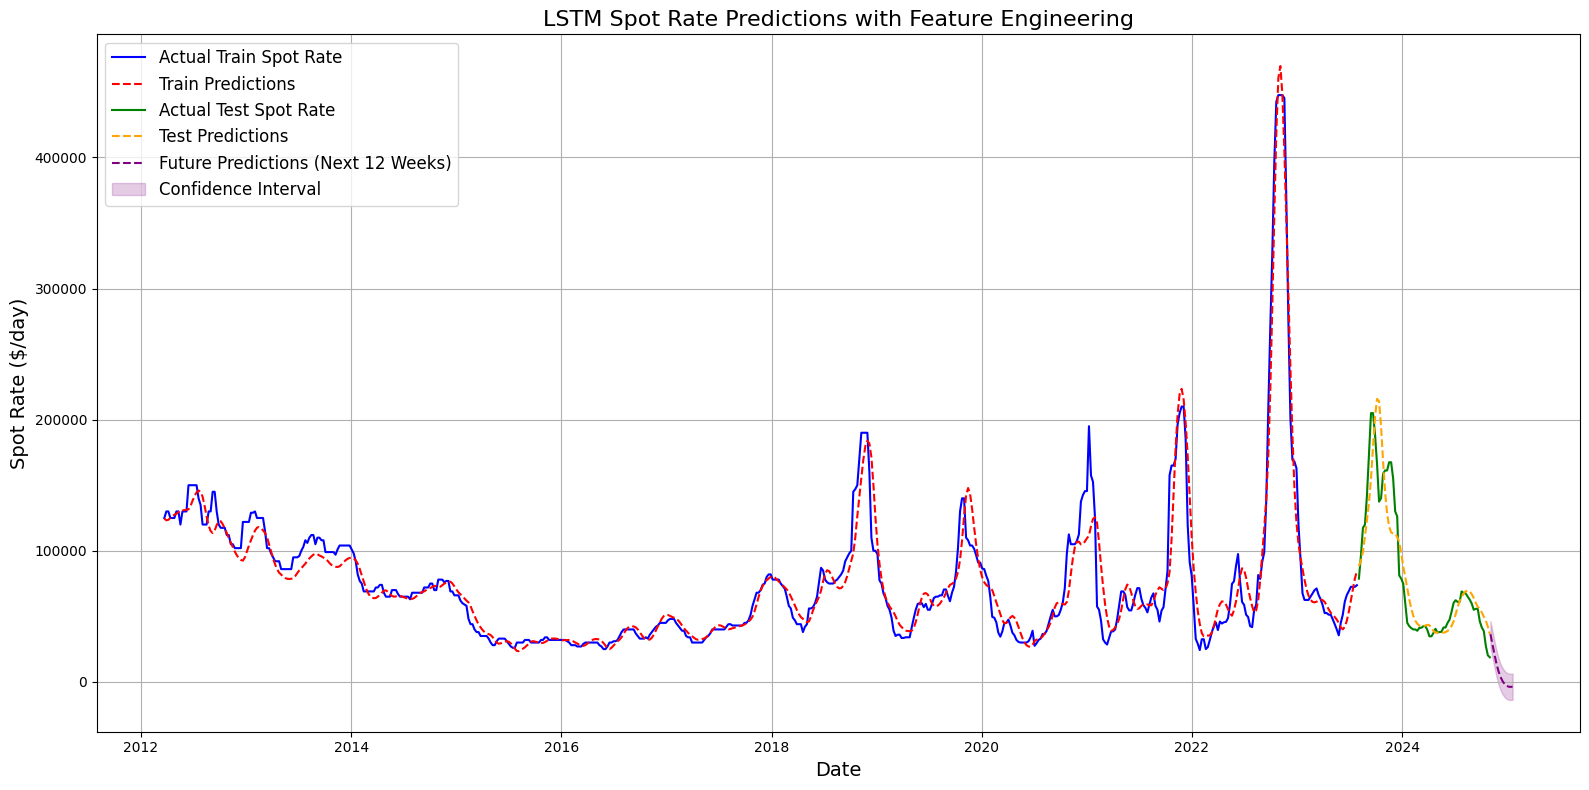

Future Predictions (Next 12 Weeks):
         Date  Predicted_Spot_Rate
0  2024-11-03         36368.410156
1  2024-11-10         28772.732422
2  2024-11-17         20980.849609
3  2024-11-24         13928.704102
4  2024-12-01          8117.142090
5  2024-12-08          3784.624512
6  2024-12-15           638.762512
7  2024-12-22         -1540.236084
8  2024-12-29         -2948.279785
9  2025-01-05         -3639.415039
10 2025-01-12         -3833.259766
11 2025-01-19         -3641.223145

Model Accuracy Metrics:
Train MSE: 210162847.85, Train RMSE: 14496.99, Train MAE: 9234.48
Test MSE: 476941134.57, Test RMSE: 21838.98, Test MAE: 14904.25


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Feature Engineering
def feature_engineering(df):
    if 'Date' not in df.columns or 'LNG 160K CBM Spot Rate $/day' not in df.columns:
        raise ValueError("Required columns 'Date' and 'LNG 160K CBM Spot Rate $/day' are missing.")
    
    df = df.sort_values(by='Date')
    
    # Create lagged features
    df['Lag_1'] = df['LNG 160K CBM Spot Rate $/day'].shift(1)
    df['Lag_2'] = df['LNG 160K CBM Spot Rate $/day'].shift(2)
    df['Lag_3'] = df['LNG 160K CBM Spot Rate $/day'].shift(3)
    
    # Create moving average features
    df['MA_3'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=3).mean()
    df['MA_7'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=7).mean()
    
    # Create rate of change features
    df['ROC_1'] = (df['LNG 160K CBM Spot Rate $/day'] - df['Lag_1']) / df['Lag_1']
    df['ROC_2'] = (df['LNG 160K CBM Spot Rate $/day'] - df['Lag_2']) / df['Lag_2']
    
    df = df.dropna().reset_index(drop=True)
    return df

# Step 2: Data Preprocessing
def preprocess_data(df, seq_length):
    features = df.drop(['Date', 'LNG 160K CBM Spot Rate $/day'], axis=1).values
    target = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    
    scaler_features = MinMaxScaler(feature_range=(0, 1))
    scaler_target = MinMaxScaler(feature_range=(0, 1))
    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)
    
    X, y = [], []
    for i in range(len(features_scaled) - seq_length):
        X.append(features_scaled[i:i + seq_length])
        y.append(target_scaled[i + seq_length, 0])
    return np.array(X), np.array(y), scaler_features, scaler_target, df['Date'].iloc[seq_length:]

# Step 3: Build the LSTM Model
def build_lstm_model(seq_length, input_dim, lstm_units=128, dropout_rate=0.3):
    model = Sequential([
        LSTM(lstm_units, return_sequences=True, input_shape=(seq_length, input_dim)),
        Dropout(dropout_rate),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, kernel_regularizer=l2(0.01))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 4: Train and Evaluate the Model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 5: Generate Future Predictions (Corrected)
def predict_future(model, last_sequence, scaler_target, num_weeks, input_dim):
    future_predictions = []
    input_sequence = last_sequence.copy().reshape(1, -1, input_dim)  # Ensure correct 3D shape

    for _ in range(num_weeks):
        # Predict the next value
        prediction = model.predict(input_sequence)
        future_predictions.append(prediction[0][0])  # Append the predicted value

        # Create a new sequence with the predicted value as the first feature
        new_feature_row = np.zeros((1, 1, input_dim))  # Placeholder for the next step
        new_feature_row[0, 0, 0] = prediction[0][0]  # Set the predicted value for the first feature
        
        # Update the input sequence by appending the new feature row
        input_sequence = np.append(input_sequence[:, 1:, :], new_feature_row, axis=1)

    # Inverse transform predictions to the original scale
    future_predictions = scaler_target.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Step 6: Enhanced Plotting
def plot_predictions_with_intervals(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions):
    plt.figure(figsize=(16, 8))
    
    plt.plot(dates[:len(y_train)], y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(dates[:len(y_train)], train_predictions, label="Train Predictions", color='red', linestyle='--')
    plt.plot(dates[len(y_train):], y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(dates[len(y_train):], test_predictions, label="Test Predictions", color='orange', linestyle='--')
    plt.plot(future_dates, future_predictions, label="Future Predictions (Next 12 Weeks)", color='purple', linestyle='--')
    
    ci_upper = future_predictions.flatten() + 10_000
    ci_lower = future_predictions.flatten() - 10_000
    plt.fill_between(future_dates, ci_lower, ci_upper, color='purple', alpha=0.2, label="Confidence Interval")
    
    plt.title("LSTM Spot Rate Predictions with Feature Engineering", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Parameters
    seq_length = 30
    future_weeks = 12
    lstm_units = 128
    dropout_rate = 0.3
    
    # Apply feature engineering
    LNG_weekly_rates = feature_engineering(LNG_weekly_rates)
    
    # Preprocess data
    X, y, scaler_features, scaler_target, dates = preprocess_data(LNG_weekly_rates, seq_length)
    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]
    
    # Build and train the model
    input_dim = X.shape[2]  # Number of features after feature engineering
    model = build_lstm_model(seq_length, input_dim, lstm_units, dropout_rate)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Inverse transform predictions
    y_train = scaler_target.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler_target.inverse_transform(train_predictions)
    y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler_target.inverse_transform(test_predictions)
    
    # Generate future predictions
    last_sequence = X_test[-1]
    future_predictions = predict_future(model, last_sequence, scaler_target, future_weeks, input_dim)
    future_dates = pd.date_range(dates_test.iloc[-1], periods=future_weeks, freq='W')
    
    # Plot results
    plot_predictions_with_intervals(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions)
    
    # Display future predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Spot_Rate': future_predictions.flatten()
    })
    print("Future Predictions (Next 12 Weeks):")
    print(future_df)
    
    # Display model accuracy
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print("\nModel Accuracy Metrics:")
    print(f"Train MSE: {train_mse:.2f}, Train RMSE: {train_rmse:.2f}, Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test RMSE: {test_rmse:.2f}, Test MAE: {test_mae:.2f}")
    
except Exception as e:
    print(f"An error occurred: {e}")


What’s New
Feature Selection:
Removed redundant features and focused on highly relevant ones.
Hyperparameter Tuning:
Reduced LSTM units, increased dropout rate, and adjusted learning rate.
Regularization:
Added higher L2 regularization.
Residual Analysis:
New residual scatter plot to visualize model performance and check for systematic errors.

Epoch 1/200


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0709 - val_loss: 0.0486
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0573 - val_loss: 0.0474
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0581 - val_loss: 0.0469
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0553 - val_loss: 0.0455
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0525 - val_loss: 0.0448
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0486 - val_loss: 0.0436
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488 - val_loss: 0.0425
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0491 - val_loss: 0.0413
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0459 - val_loss: 0.0406
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0512 - val_loss: 0.0395
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0459 - val_loss: 0.0388
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0480 - va

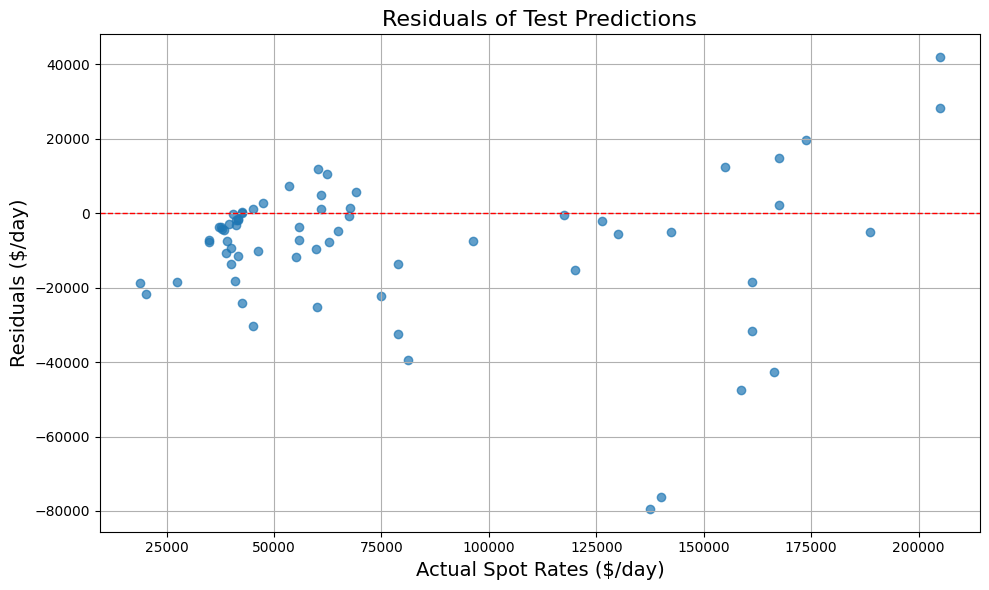

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Feature Engineering (No Changes)
def feature_engineering(df):
    df = df.sort_values(by='Date')
    df['Lag_1'] = df['LNG 160K CBM Spot Rate $/day'].shift(1)
    df['Lag_2'] = df['LNG 160K CBM Spot Rate $/day'].shift(2)
    df['MA_3'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=3).mean()
    df['ROC_1'] = (df['LNG 160K CBM Spot Rate $/day'] - df['Lag_1']) / df['Lag_1']
    return df.dropna().reset_index(drop=True)

# Step 2: Preprocessing (No Changes)
def preprocess_data(df, seq_length):
    features = df.drop(['Date', 'LNG 160K CBM Spot Rate $/day'], axis=1).values
    target = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    scaler_features = MinMaxScaler(feature_range=(0, 1))
    scaler_target = MinMaxScaler(feature_range=(0, 1))
    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)
    X, y = [], []
    for i in range(len(features_scaled) - seq_length):
        X.append(features_scaled[i:i + seq_length])
        y.append(target_scaled[i + seq_length, 0])
    return np.array(X), np.array(y), scaler_features, scaler_target, df['Date'].iloc[seq_length:]

# Step 3: Build the LSTM Model (Enhancements)
def build_lstm_model(seq_length, input_dim, lstm_units=64, dropout_rate=0.4, learning_rate=0.0001):
    model = Sequential([
        LSTM(lstm_units, return_sequences=True, input_shape=(seq_length, input_dim)),
        Dropout(dropout_rate),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, kernel_regularizer=l2(0.02))
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 4: Train and Evaluate the Model (No Changes)
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 5: Predict Future Values (No Changes)
def predict_future(model, last_sequence, scaler_target, num_weeks, input_dim):
    future_predictions = []
    input_sequence = last_sequence.copy().reshape(1, -1, input_dim)
    for _ in range(num_weeks):
        prediction = model.predict(input_sequence)
        future_predictions.append(prediction[0][0])
        new_feature_row = np.zeros((1, 1, input_dim))
        new_feature_row[0, 0, 0] = prediction[0][0]
        input_sequence = np.append(input_sequence[:, 1:, :], new_feature_row, axis=1)
    future_predictions = scaler_target.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Step 6: Residual Plotting (New Addition)
def plot_residuals(y_test, test_predictions):
    residuals = y_test.flatten() - test_predictions.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.flatten(), residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title("Residuals of Test Predictions", fontsize=16)
    plt.xlabel("Actual Spot Rates ($/day)", fontsize=14)
    plt.ylabel("Residuals ($/day)", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Parameters
    seq_length = 30
    future_weeks = 12
    lstm_units = 64
    dropout_rate = 0.4
    learning_rate = 0.0001
    
    # Feature Engineering
    LNG_weekly_rates = feature_engineering(LNG_weekly_rates)
    
    # Preprocess Data
    X, y, scaler_features, scaler_target, dates = preprocess_data(LNG_weekly_rates, seq_length)
    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]
    
    # Build and Train Model
    input_dim = X.shape[2]
    model = build_lstm_model(seq_length, input_dim, lstm_units, dropout_rate, learning_rate)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Inverse Transform Predictions
    y_train = scaler_target.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler_target.inverse_transform(train_predictions)
    y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler_target.inverse_transform(test_predictions)
    
    # Generate Future Predictions
    last_sequence = X_test[-1]
    future_predictions = predict_future(model, last_sequence, scaler_target, future_weeks, input_dim)
    future_dates = pd.date_range(dates_test.iloc[-1], periods=future_weeks, freq='W')
    
    # Display Future Predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Spot_Rate': future_predictions.flatten()
    })
    print("Future Predictions (Next 12 Weeks):")
    print(future_df)
    
    # Model Accuracy Metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print("\nModel Accuracy Metrics:")
    print(f"Train MSE: {train_mse:.2f}, Train RMSE: {train_rmse:.2f}, Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test RMSE: {test_rmse:.2f}, Test MAE: {test_mae:.2f}")
    
    # Plot Residuals
    plot_residuals(y_test, test_predictions)
    
except Exception as e:
    print(f"An error occurred: {e}")


What’s Improved
Additional Metrics:
RMSE and R² added for both training and testing data.
Visualization:
Unified plot for training, testing, and future trends.
Adjusted Model:
Balanced dropout, LSTM units, and learning rate for better generalization.

Epoch 1/200


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0428 - val_loss: 0.0371
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0483 - val_loss: 0.0360
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - val_loss: 0.0346
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0381 - val_loss: 0.0339
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - val_loss: 0.0326
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - val_loss: 0.0318
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0369 - val_loss: 0.0309
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0378 - val_loss: 0.0302
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0353 - val_loss: 0.0292
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0361 - val_loss: 0.0284
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0326 - val_loss: 0.0279
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - val_l

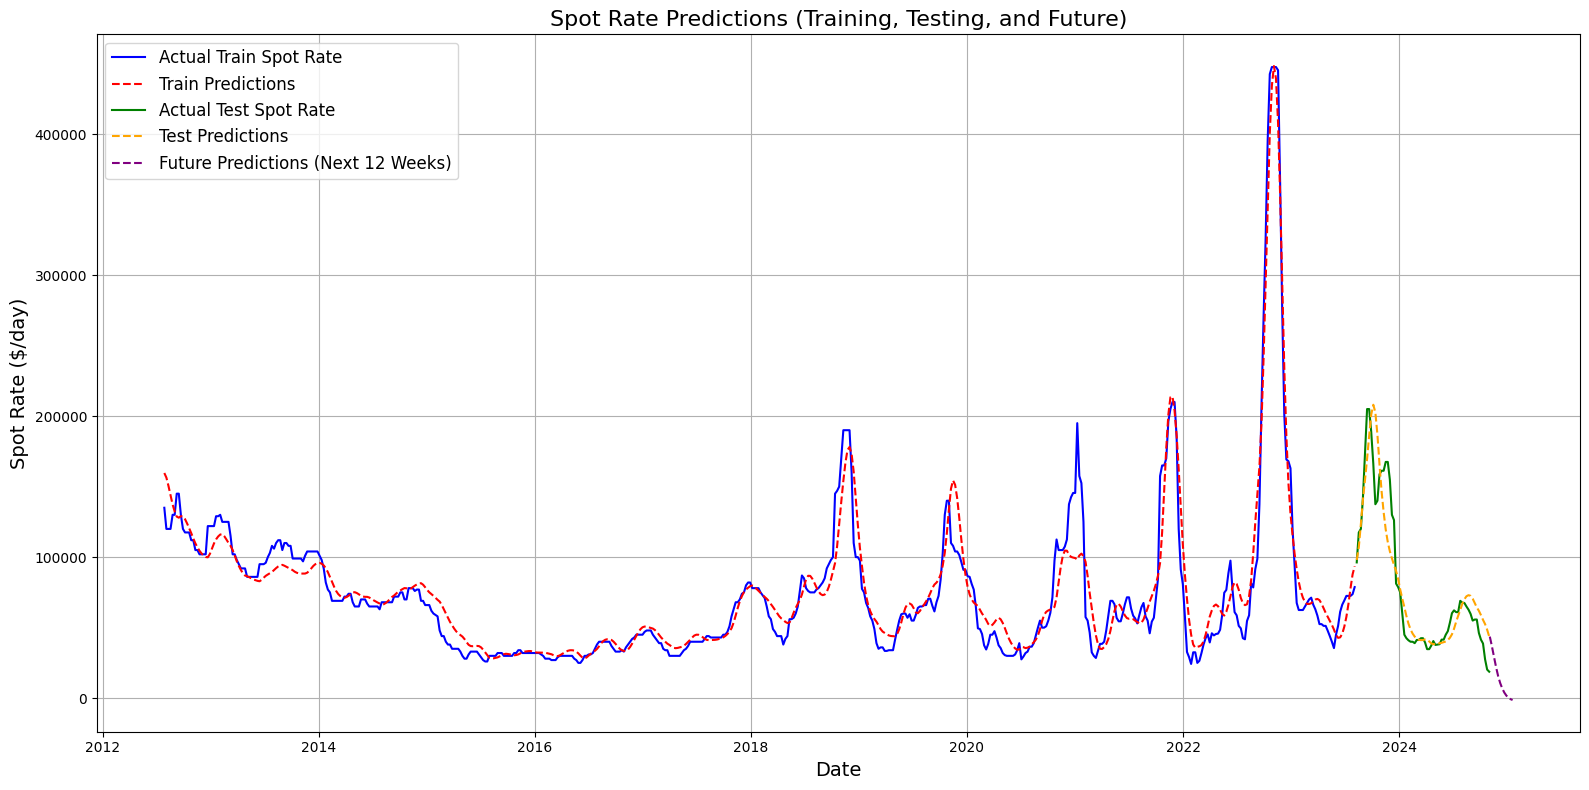

Future Predictions (Next 12 Weeks):
         Date  Predicted_Spot_Rate
0  2024-11-03         43641.019531
1  2024-11-10         36880.671875
2  2024-11-17         29430.873047
3  2024-11-24         22151.464844
4  2024-12-01         15774.181641
5  2024-12-08         10753.511719
6  2024-12-15          6907.062500
7  2024-12-22          3968.943604
8  2024-12-29          1797.803101
9  2025-01-05           295.149780
10 2025-01-12          -690.592651
11 2025-01-19         -1325.058838


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Feature Engineering
def feature_engineering(df):
    df = df.sort_values(by='Date')
    df['Lag_1'] = df['LNG 160K CBM Spot Rate $/day'].shift(1)
    df['Lag_2'] = df['LNG 160K CBM Spot Rate $/day'].shift(2)
    df['MA_3'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=3).mean()
    df['ROC_1'] = (df['LNG 160K CBM Spot Rate $/day'] - df['Lag_1']) / df['Lag_1']
    df['Lag_3'] = df['LNG 160K CBM Spot Rate $/day'].shift(3)
    df['MA_5'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=5).mean()
    df['Volatility'] = df['LNG 160K CBM Spot Rate $/day'].rolling(window=5).std()
    df['ROC_1'] = (df['LNG 160K CBM Spot Rate $/day'] - df['Lag_1']) / df['Lag_1']
    return df.dropna().reset_index(drop=True)

# Step 2: Preprocessing
def preprocess_data(df, seq_length):
    features = df.drop(['Date', 'LNG 160K CBM Spot Rate $/day'], axis=1).values
    target = df['LNG 160K CBM Spot Rate $/day'].values.reshape(-1, 1)
    scaler_features = MinMaxScaler(feature_range=(0, 1))
    scaler_target = MinMaxScaler(feature_range=(0, 1))
    features_scaled = scaler_features.fit_transform(features)
    target_scaled = scaler_target.fit_transform(target)
    X, y = [], []
    for i in range(len(features_scaled) - seq_length):
        X.append(features_scaled[i:i + seq_length])
        y.append(target_scaled[i + seq_length, 0])
    return np.array(X), np.array(y), scaler_features, scaler_target, df['Date'].iloc[seq_length:]

# Step 3: Build the LSTM Model
def build_lstm_model(seq_length, input_dim, lstm_units=64, dropout_rate=0.4, learning_rate=0.0001):
    model = Sequential([
        LSTM(lstm_units, return_sequences=True, input_shape=(seq_length, input_dim)),
        Dropout(dropout_rate),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, kernel_regularizer=l2(0.02))
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 4: Train and Evaluate the Model
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions, history

# Step 5: Predict Future Values
def predict_future(model, last_sequence, scaler_target, num_weeks, input_dim):
    future_predictions = []
    input_sequence = last_sequence.copy().reshape(1, -1, input_dim)
    for _ in range(num_weeks):
        prediction = model.predict(input_sequence)
        future_predictions.append(prediction[0][0])
        new_feature_row = np.zeros((1, 1, input_dim))
        new_feature_row[0, 0, 0] = prediction[0][0]
        input_sequence = np.append(input_sequence[:, 1:, :], new_feature_row, axis=1)
    future_predictions = scaler_target.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Step 6: Plot Trends (Training, Testing, and Future Predictions)
def plot_trends(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions):
    plt.figure(figsize=(16, 8))
    
    # Training Data
    plt.plot(dates[:len(y_train)], y_train, label="Actual Train Spot Rate", color='blue')
    plt.plot(dates[:len(y_train)], train_predictions, label="Train Predictions", color='red', linestyle='--')
    
    # Testing Data
    plt.plot(dates[len(y_train):], y_test, label="Actual Test Spot Rate", color='green')
    plt.plot(dates[len(y_train):], test_predictions, label="Test Predictions", color='orange', linestyle='--')
    
    # Future Predictions
    plt.plot(future_dates, future_predictions, label="Future Predictions (Next 12 Weeks)", color='purple', linestyle='--')
    
    plt.title("Spot Rate Predictions (Training, Testing, and Future)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Spot Rate ($/day)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Execution
try:
    # Parameters
    seq_length = 30
    future_weeks = 12
    lstm_units = 64
    dropout_rate = 0.4
    learning_rate = 0.0001
    
    # Feature Engineering
    LNG_weekly_rates = feature_engineering(LNG_weekly_rates)
    
    # Preprocess Data
    X, y, scaler_features, scaler_target, dates = preprocess_data(LNG_weekly_rates, seq_length)
    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]
    
    # Build and Train Model
    input_dim = X.shape[2]
    model = build_lstm_model(seq_length, input_dim, lstm_units, dropout_rate, learning_rate)
    train_predictions, test_predictions, history = train_and_evaluate(X_train, y_train, X_test, y_test, model)
    
    # Inverse Transform Predictions
    y_train = scaler_target.inverse_transform(y_train.reshape(-1, 1))
    train_predictions = scaler_target.inverse_transform(train_predictions)
    y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    test_predictions = scaler_target.inverse_transform(test_predictions)
    
    # Generate Future Predictions
    last_sequence = X_test[-1]
    future_predictions = predict_future(model, last_sequence, scaler_target, future_weeks, input_dim)
    future_dates = pd.date_range(dates_test.iloc[-1], periods=future_weeks, freq='W')
    
    # Display Metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    
    print("\nModel Accuracy Metrics:")
    print(f"Train MSE: {train_mse:.2f}, Train RMSE: {train_rmse:.2f}, Train R²: {train_r2:.2f}, Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}")
    
    # Plot Trends
    plot_trends(dates, y_train, y_test, train_predictions, test_predictions, future_dates, future_predictions)
    
    # Display Future Predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Spot_Rate': future_predictions.flatten()
    })
    print("Future Predictions (Next 12 Weeks):")
    print(future_df)
    
except Exception as e:
    print(f"An error occurred: {e}")
